<a href="https://colab.research.google.com/github/CR-MLE/Machine-Learning/blob/main/week2_Computer_vision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
print(tf.__version__)

2.9.2


In [2]:
#load Fashion MNIST data
fmist = tf.keras.datasets.fashion_mnist

# these are 28x28 pixels clathing images and already available in the keras library

In [3]:
(training_images,training_labels), (test_images,test_labels) = fmist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


Label: 4

 image pixel array: 
 [[  0   0   0   0   0   0   0   0   0   0  90 156 177 182 196 176 117   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   2   0   0 239 253 239 214 226 214 231 245 248   0   0   1   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0  36 241 203 219 192 190 193 207 200 232 135   0   0   2   0   0   0   0   0   0]
 [  0   0   0   0   1   0   0  33 167 227 229 234 228 234 244 215 211 214 208 120   0   0   2   0   0   0   0   0]
 [  0   0   0   0   0   0 157 227 207 207 229 229 232 207 241 227 235 224 203 221 176   0   0   2   0   0   0   0]
 [  0   0   0   0   0  65 218 189 192 187 196 189 188 202 181 195 222 219 190 180 217 125   0   0   0   0   0   0]
 [  0   0   0   0   0 158 213 196 196 191 188 186 179 192 177 192 126 155 193 189 200 166   0   0   0   0   0   0]
 [  0   0   0   0   0 163 217 211 176 188 188 186 183 196 180 191 165 170 216 204 200 195   0   0   0   0   0   0]
 [  0   0   0   0   0 183 215 234 185 182 186 18

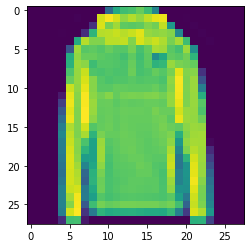

In [4]:
import numpy as np
import matplotlib.pyplot as plt
# there are 60K pics starting from 0
index = 24
#set number of rows when printing
np.set_printoptions(linewidth=320)
#print the label and image

print(f'Label: {training_labels[index]}')
print(f'\n image pixel array: \n {training_images[index]}')

#print the image
plt.imshow(training_images[index])

In [6]:
#for the  model learning , it is advisable to keep values in 0 and 1 , hence dividing by 255

training_images = training_images/255.0
test_images = test_images/255.00

#print(training_images[4])

[[0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.00039985 0.         0.         0.         0.         0.         0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.         0.         0.         0.00290657 0.00316801 0.00287582 0.00049212 0.         0.         0.         0.00039985 0.00333718 0.00347559 0.00301423 0.00016917 0.         0.         0.         0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.         0.         0.         0.00295271 0.00349097 0.00359862 0.00373702 0.0035371  0.00226067 0.00367551 0.00372165 0.00359862 0.00335256 0.00321415 0.         0.         0.         0.         0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.        

In [9]:
#build classification model
model=tf.keras.Sequential([tf.keras.layers.Flatten(),
                           tf.keras.layers.Dense(128, activation=tf.nn.relu),
                           tf.keras.layers.Dense(10, activation =tf.nn.softmax)])
#softmax regression is multiclass  classification. 

In [14]:
#Declare sample inputs and convert to a tensor

inputs = np.array([[1.0,3.0,4.0,2.0]])
inputs = tf.convert_to_tensor(inputs)
print(f'inputs to softmax function:{inputs.numpy()}')

#feed the input tensor to softmax function

output = tf.keras.activations.softmax(inputs)
print(f'output  by softmax: {output.numpy()}')

#get the sum of all values after the softmax

sum  = tf.reduce_sum(output)
print(f'sum of output: {sum}')

#Get the index with highest value
prediction = np.argmax(output)

print(f'class with higest probability: {prediction}')

inputs to softmax function:[[1. 3. 4. 2.]]
output  by softmax: [[0.0320586  0.23688282 0.64391426 0.08714432]]
sum of output: 1.0
class with higest probability: 2


In [37]:
model.compile(optimizer = tf.optimizers.Adam(),
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.fit(training_images, training_labels, epochs = 10)

Epoch 1/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.4827 - accuracy: 0.8298
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4672 - accuracy: 0.8349
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.4554 - accuracy: 0.8402
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4453 - accuracy: 0.8430
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.4367 - accuracy: 0.8471
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4297 - accuracy: 0.8486
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4230 - accuracy: 0.8511
Epoch 8/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.4177 - accuracy: 0.8530
Epoch 9/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4124 - accuracy: 0.8552
Epoch 10/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.407

In [38]:
model.evaluate(test_images, test_labels)
#evaluate function gives error and accuracy

313/313 [==============================] - 1s 2ms/step - loss: 0.4426 - accuracy: 0.8394


[0.44259077310562134, 0.8393999934196472]

In [39]:
#excericse 1
classifications = model.predict(test_images)
#output1 = classifications[0].numpy()



313/313 [==============================] - 1s 2ms/step


In [40]:
print(f'predicted value of first image: {np.argmax(classifications[0])}')
print(f'actual image: {test_labels[0]}')
#when I increased the number of epocs to 10 , the actual and predicted image was same.

predicted value of first image: 9
actual image: 9


In [46]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self,epoch,logs={}):
    #halt the training when it reaches the accuracy

    if (logs.get('loss')<0.4):
      print("\n stop training as loss is reduced below 0.4")
      self.model.stop_training  = True
callbacks  = myCallback()


In [48]:
fminst =tf.keras.datasets.fashion_mnist

(training_images,training_labels),(test_images,test_labels) = fminst.load_data()
training_images = training_images/255.0
test_images = test_images/255.0

model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(512,activation=tf.nn.relu),
                                    tf.keras.layers.Dense(10,activation=tf.nn.softmax)])
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy')
model.fit(training_images, training_labels, epochs=5,callbacks = [callbacks])
model.evaluate(test_images, test_labels)
classifications = model.predict(test_images)

print(f'predicted value of first image: {np.argmax(classifications[0])}')
print(f'actual image: {test_labels[0]}')

Epoch 1/5
1875/1875 [==============================] - 12s 6ms/step - loss: 0.4763
Epoch 2/5
1868/1875 [============================>.] - ETA: 0s - loss: 0.3592
 stop training as loss is reduced below 0.4
313/313 [==============================] - 1s 3ms/step
predicted value of first image: 9
actual image: 9
